## NTS base case

<img src="nts.png" width="600">


In [1]:
from pydae.bmapu import bmapu_builder

In [2]:
grid = bmapu_builder.bmapu('nts_base.json')
grid.checker()
grid.uz_jacs = True
grid.verbose = False
grid.build('nts')

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from pydae.bmapu.lines import  change_line
import pydae.ssa as ssa
from IPython.core.display import HTML,SVG
import nts

In [16]:
lf = 1.0
params = {'p_c_1':0.935*lf, # generator at bus 1 power reference
          'P_2':-1250e6*lf,'P_3':-4000e6*lf, # loads
          }


model = nts.model()

change_line(model,'2','3',R_pu=0.0,X_pu=0.6,S_mva=100)
model.ini(params,'xy_0.json')
model.save_xy_0('xy_1.json')

S_n_1,S_n_4,p_g_1,p_g_4 = model.get_mvalue(['S_n_1','S_n_4','p_g_1','p_g_4'])
print(f'P_g1 = {p_g_1*S_n_1/1e6:0.0f} MW, P_g4 = {p_g_4*S_n_4/1e6:0.0f} MW')
model.report_y()

P_g1 = 1389 MW, P_g4 = 3861 MW
V_1   =  1.00
theta_1 =  0.22
V_2   =  0.98
theta_2 =  0.07
V_3   =  0.99
theta_3 = -0.95
V_4   =  1.00
theta_4 = -0.83
V_5   =  0.98
theta_5 =  0.07
i_d_1 =  0.86
i_q_1 =  0.40
p_g_1 =  0.93
q_g_1 =  0.18
v_f_1 =  2.42
p_m_ref_1 =  0.93
p_m_1 =  0.93
v_pss_1 = -0.00
i_d_4 =  0.64
i_q_4 =  0.44
p_g_4 =  0.77
q_g_4 =  0.11
v_f_4 =  1.84
p_m_4 =  0.78
omega_coi =  1.00
p_agc = -0.12


## Small signal analysis

In [5]:
ssa.A_eval(model);
ssa.damp_report(model).round(2).sort_values('Damp')

,Real,Imag,Freq.,Damp
Mode 15,-0.17,-1.24,0.20,0.14
Mode 14,-0.17,1.24,0.20,0.14
Mode 22,-0.21,-0.38,0.06,0.48
Mode 21,-0.21,0.38,0.06,0.48
Mode 12,-2.01,-1.96,0.31,0.71
Mode 11,-2.01,1.96,0.31,0.71
Mode 17,-1.53,0.96,0.15,0.85
Mode 18,-1.53,-0.96,0.15,0.85
Mode 7,-9.59,-3.67,0.58,0.93
Mode 6,-9.59,3.67,0.58,0.93


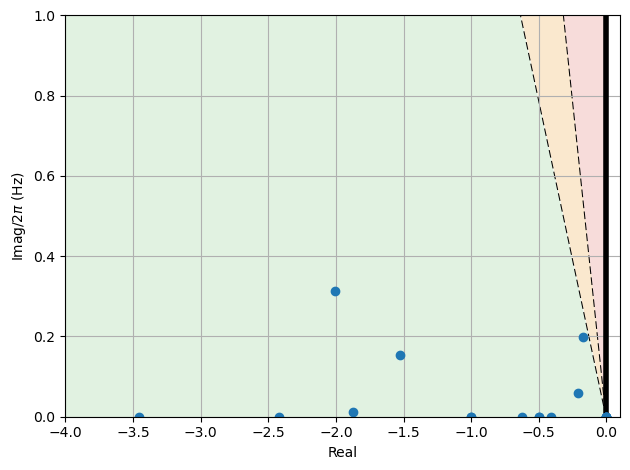

In [6]:
ssa.plot_eig(model.eigvalues, x_min=-4,x_max=0.1,y_min=0,y_max=1);

### Participation factors

In [7]:
ssa.participation(model)['Mode 15'].abs().round(2).sort_values(ascending=False)

delta_1      0.39
omega_1      0.30
omega_4      0.19
delta_4      0.12
x_lpf7_1     0.06
x_wo2_1      0.04
x_wo1_1      0.04
xi_v_1       0.03
x_ll1_1      0.03
x_4_gov_4    0.02
x_5_gov_4    0.02
x_wo3_1      0.02
e1q_1        0.02
x_ll3_1      0.02
x_3_gov_4    0.01
x_6_gov_4    0.01
e1d_1        0.01
e1q_4        0.01
xi_v_4       0.00
x_cb_4       0.00
e1d_4        0.00
x_9_3_1      0.00
x_9_5_1      0.00
x_9_4_1      0.00
x_9_2_1      0.00
x_9_1_1      0.00
xi_imw_1     0.00
x_gov_2_1    0.00
x_gov_1_1    0.00
xi_m_1       0.00
x_a_1        0.00
xi_freq      0.00
Name: Mode 15, dtype: float64

In [8]:
ssa.participation(model)['Mode 15'].abs().round(2).sort_values(ascending=False)

delta_1      0.39
omega_1      0.30
omega_4      0.19
delta_4      0.12
x_lpf7_1     0.06
x_wo2_1      0.04
x_wo1_1      0.04
xi_v_1       0.03
x_ll1_1      0.03
x_4_gov_4    0.02
x_5_gov_4    0.02
x_wo3_1      0.02
e1q_1        0.02
x_ll3_1      0.02
x_3_gov_4    0.01
x_6_gov_4    0.01
e1d_1        0.01
e1q_4        0.01
xi_v_4       0.00
x_cb_4       0.00
e1d_4        0.00
x_9_3_1      0.00
x_9_5_1      0.00
x_9_4_1      0.00
x_9_2_1      0.00
x_9_1_1      0.00
xi_imw_1     0.00
x_gov_2_1    0.00
x_gov_1_1    0.00
xi_m_1       0.00
x_a_1        0.00
xi_freq      0.00
Name: Mode 15, dtype: float64

### Mode shapes

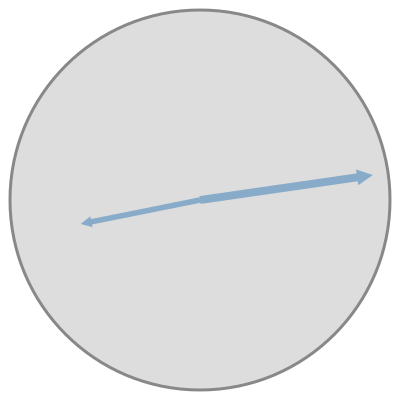

In [9]:
ssa.shape2df(model)
SVG(ssa.plot_shapes(model,mode='Mode 15',    states=['omega_1', 'omega_4']))

## Time domain simulation

In [10]:
model.Dt = 0.01
params.update({'T_b_4':10.0,'v_ref_1':1.0,'v_ref_4':1.0,'K_a_4':200,"Droop_1":1000.0})

model.ini(params,'xy_1.json')

model.run( 1.0,{'v_ref_4':1.0})
model.run( 40.0,{'v_ref_4':1.02})

model.post();

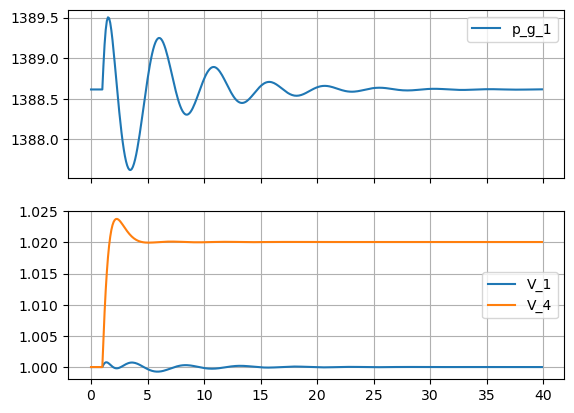

In [11]:
fig,axes = plt.subplots(nrows=2, sharex=True)
axes[0].plot(model.Time,  model.get_values('p_g_1')*model.get_value('S_n_1')/1e6,label='p_g_1')
#axes[0].plot(model.Time,  model.get_values('p_m_1'),label='p_m_1')

axes[1].plot(model.Time,  model.get_values('V_1'),label='V_1')
axes[1].plot(model.Time,  model.get_values('V_4'),label='V_4')

for ax in axes:
    ax.grid()
    ax.legend()

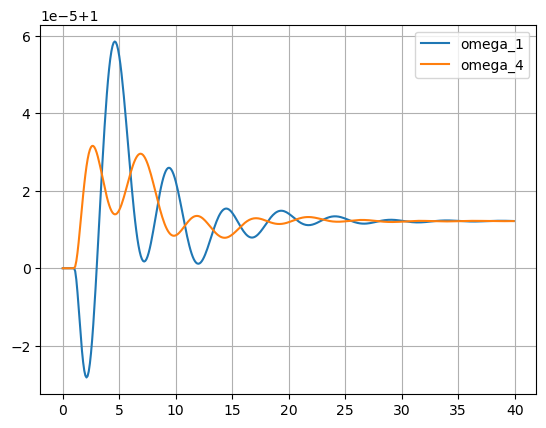

In [12]:
fig,axes = plt.subplots(nrows=1, sharex=True)

axes.plot(model.Time,  model.get_values('omega_1'),label='omega_1')
axes.plot(model.Time,  model.get_values('omega_4'),label='omega_4')
axes.grid()
axes.legend()